In [ ]:
# !pip install gcpds
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.filters.git
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git
# FILEID = "121RAmnPo8lMxvEywEkT2wyFJNTaticlD" 
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O EEGFeatExtraction.py && rm -rf /tmp/cookies.txt !pip install -U git+https://github.com/UN-GCPDS/python-gcpds.filters.git 
# !pip install mne

  Cloning https://github.com/UN-GCPDS/python-gcpds.filters.git to /tmp/pip-req-build-adpzqdxb
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.filters.git /tmp/pip-req-build-adpzqdxb
  Created wheel for gcpds-filters: filename=gcpds_filters-0.1a0-py3-none-any.whl size=817588 sha256=11927f8bf3929d5fdf477bbccb9450c09139496c707891b7e6dbce3f012b7159
  Stored in directory: /tmp/pip-ephem-wheel-cache-pokr5k0f/wheels/36/7a/78/d27d0f0c7be2222e2c76dcafd6840212fbc620d24f8a7c13f0
Successfully built gcpds-filters
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-crnq3aea
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-crnq3aea
     |████████████████████████████████| 6.9 MB 8.4 MB/s 
  Created wheel for gcpds-utils: filename=gcpds_utils-0.1a3-py3-none-any.whl size=116894 sha256=a3871a0d25c3d0e06f7c45748f63a0e903250bce620783021f8b4c889292ac07
  Stored in directory: /tmp/pip-ephem-wheel-cache-

In [ ]:
import mne
from mne.preprocessing import ICA
from google.colab import drive
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import pickle
from ipywidgets import interact_manual
from ipywidgets import interact
# from MIfunctions import *
# from CKA_keras import *
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from time import time
import os
import numpy as np
from numpy import angle, sin, cos, sqrt
from scipy.io import loadmat
# !pip install mat73
# from mat73 import loadmat
import scipy as sp
from scipy.io import savemat
from scipy.signal import butter, lfilter, welch, hanning, filtfilt, hilbert
import matplotlib.pyplot as plt
from gcpds.utils import loaddb
from gcpds.utils.visualizations import plot_eeg, plot_topoplot

In [ ]:
from scipy.stats import pearsonr

def ICA_EEG2(X, info, EEG_channels):
  # X_= X[:len(EEG_channels),:]
  X_ = X.get_data()[:,:len(EEG_channels),:]
  # EEG_ICA = np.zeros(X_.shape)
  signals = X #mne.io.RawArray(X, info)
  filt_signals = signals.copy()
  ica = mne.preprocessing.ICA(n_components=len(EEG_channels),random_state=97)
  ica.fit(filt_signals)
  # eog_indices = []
  # eog_scores = []
  # for eog_ch in EOG_channels:
  #   eog_indices_aux, eog_scores_aux = ica.find_bads_eog(filt_signals, ch_name=eog_ch, threshold=3.0, verbose=False)
  #   eog_scores.append(eog_scores_aux)
  #   if len(eog_indices_aux)>0:
  #       for IC in eog_indices_aux:
  #         if IC not in eog_indices:
  #           eog_indices.append(IC)
  # ica.exclude = eog_indices
  corr_p = []
  vals = ica.get_sources(signals).get_data()
  for comp in range(vals.shape[1]):
    corr_tr = []
    for tr in range(X_.shape[0]):      
      # dat_max =np.argmax(np.array([abs(pearsonr(vals[tr,comp,:],
      #                                           signals.get_data()[tr,0,:])[0]),
      #                              abs(pearsonr(vals[tr,comp,:],
      #                                           signals.get_data()[tr,32,:])[0]),
      #                              abs(pearsonr(vals[tr,comp,:],
      #                                           signals.get_data()[tr,33,:])[0])]))
      if abs(pearsonr(vals[tr,comp,:],signals.get_data()[tr,0,:])[0]) > 0.6:
        corr_tr.append(comp)
      if abs(pearsonr(vals[tr,comp,:],signals.get_data()[tr,32,:])[0]) > 0.6:
        corr_tr.append(comp)
      if abs(pearsonr(vals[tr,comp,:],signals.get_data()[tr,33,:])[0]) > 0.6:
        corr_tr.append(comp)
      corr_tr.append(dat_max)
    if len(corr_tr)>0:
      corr_p.append(np.asarray(corr_tr))
    # corr_p.append(np.asarray(corr_tr))
  if len(corr_p) > 0:
    ica.exclude= list(np.unique(np.concatenate(corr_p)))
  reconst_raw = signals.copy()
  ica.apply(reconst_raw)
  # ._data[0:len(EEG_channels),:]
  # return reconst_raw, eog_indices, np.round(np.array(eog_scores),4), ica    
  return reconst_raw,corr_p,ica
  # return corr_p

In [ ]:
from scipy.stats import pearsonr

def ICA_EEG3(X, X2, info, info2, EEG_channels):
  # X_= X[:len(EEG_channels),:]
  X_ = X.get_data()[:,:len(EEG_channels),:]
  # EEG_ICA = np.zeros(X_.shape)
  signals = X #mne.io.RawArray(X, info)
  filt_signals = signals.copy()
  signals2 = X2 #mne.io.RawArray(X, info)
  filt_signals2 = signals2.copy()
  ica1 = mne.preprocessing.ICA(n_components=len(EEG_channels),random_state=97)
  ica2 = mne.preprocessing.ICA(n_components=3,random_state=97)
  ica1.fit(filt_signals)
  ica2.fit(filt_signals2)
  # eog_indices = []
  # eog_scores = []
  # for eog_ch in EOG_channels:
  #   eog_indices_aux, eog_scores_aux = ica.find_bads_eog(filt_signals, ch_name=eog_ch, threshold=3.0, verbose=False)
  #   eog_scores.append(eog_scores_aux)
  #   if len(eog_indices_aux)>0:
  #       for IC in eog_indices_aux:
  #         if IC not in eog_indices:
  #           eog_indices.append(IC)
  # ica.exclude = eog_indices
  corr_p = []
  vals1 = ica1.get_sources(signals).get_data()
  vals2 = ica2.get_sources(signals2).get_data()
  argmax = np.argmax(np.linalg.norm(np.squeeze(vals2),axis=1))
  for comp in range(vals1.shape[1]):
    corr_tr = []
    for tr in range(X_.shape[0]):
      if abs(pearsonr(vals1[tr,comp,:],vals2[tr,argmax,:])[0]) > 0.6:
      # if abs(pearsonr(vals[tr,comp,:],signals.get_data()[tr,0,:])[0]) > 0.6:
        corr_tr.append(comp)
      # if abs(pearsonr(vals[tr,comp,:],signals.get_data()[tr,32,:])[0]) > 0.6:
      #   corr_tr.append(comp)
      # if abs(pearsonr(vals[tr,comp,:],signals.get_data()[tr,33,:])[0]) > 0.6:
      #   corr_tr.append(comp)
    if len(corr_tr)>0:
      corr_p.append(np.asarray(corr_tr))
    # corr_p.append(np.asarray(corr_tr))
  if len(corr_p) > 0:
    ica1.exclude= list(np.unique(np.concatenate(corr_p)))
  reconst_raw = signals.copy()
  ica1.apply(reconst_raw)
  # ._data[0:len(EEG_channels),:]
  # return reconst_raw, eog_indices, np.round(np.array(eog_scores),4), ica    
  return reconst_raw,corr_p,ica1
  # return vals1,vals2,argmax

In [ ]:
raw.get_data()[:,[0,32,33],:].shape

(1, 3, 23552)

sujeto:  17


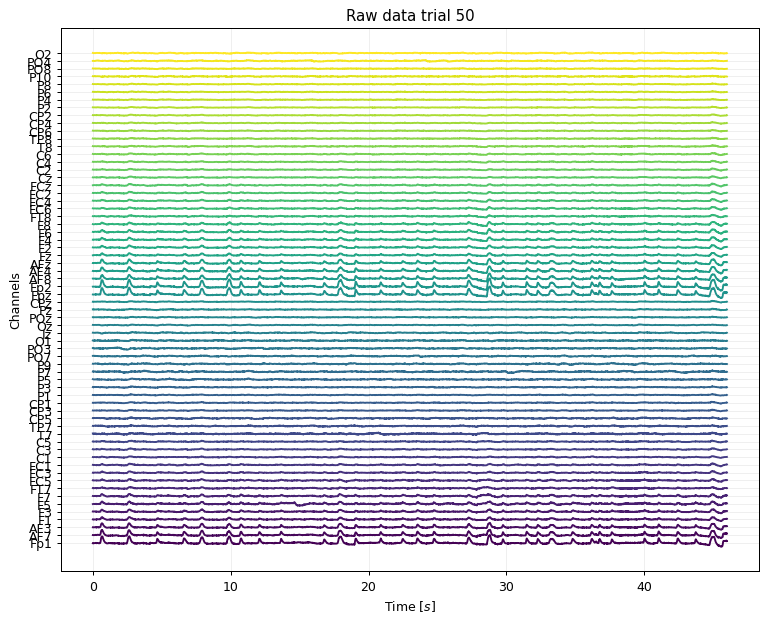

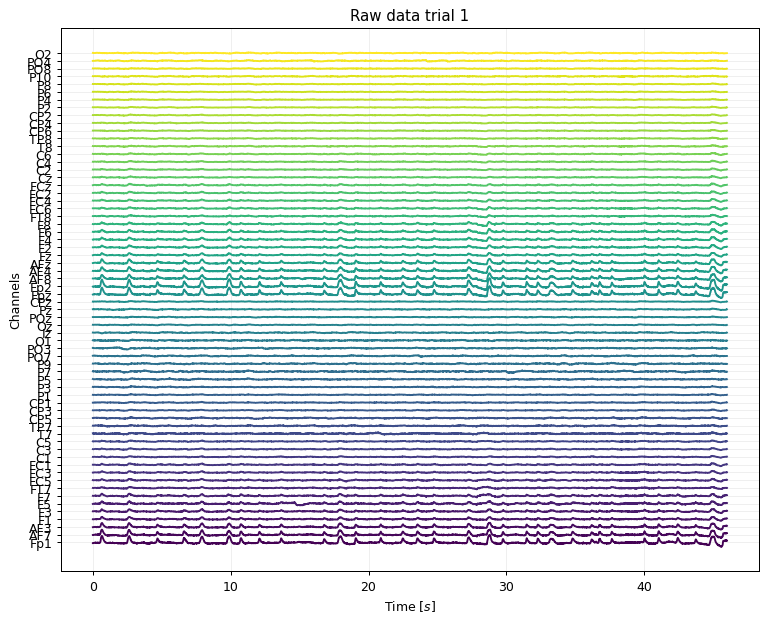

In [ ]:
## resting data
# Subjects= np.arange(1,1)
# Subjects = list(np.arange(1,22))
channels = ['Fp1','AF7','AF3','F1','F3','F5','F7','FT7','FC5','FC3','FC1','C1',
            'C3','C5','T7','TP7','CP5','CP3','CP1','P1','P3','P5','P7','P9',
            'PO7','PO3','O1','Iz','Oz','POz','Pz','CPz','Fpz','Fp2','AF8','AF4',
            'AFz','Fz','F2','F4','F6','F8','FT8','FC6','FC4','FC2','FCz','Cz',
            'C2','C4','C6','T8','TP8','CP6','CP4','CP2','P2','P4','P6','P8','P10','PO8','PO4','O2']
# n_channels    = 22
sampling_freq = 512         # Frecuencia de muestreo de la base de datos.

load_path = '/content/drive/Shareddrives/GCPDS/databases/GIGA-MI_ME/'
# ch_names = channels
# y = list()
# method = 'fastica'

data_ref = list()
data_ref_raw = list()
raw_ = list()
X_ica_ = list()
for s in [17]: #Subjects:
  print('sujeto: ', s)
  if s < 10:
    S_ERP = loadmat(load_path + f"s0"+str(s)+".mat")
  else:
    S_ERP = loadmat(load_path + f"s"+str(s)+".mat")
  data  = S_ERP['eeg'][0][0][1]
  
  ch_names = channels
  n_channels = len(channels)
  # data = S_ERP['base']
  # data = np.transpose(data, (1,0)) # transponer en canales x tiempo
  data = data[:n_channels,10*sampling_freq:-10*sampling_freq]
  # data_target = data#[:,:n_channels,:]
  data_target = np.zeros((1,data.shape[0],data.shape[1]))
  data_target[0,:,:] = data

  # for ch in range(n_channels):
  #   if ch_names[ch][0] == ' ':
  #     ch_names[ch] = ch_names[ch][1:]

  # EOG_channels = channels[0]#[-3:]
  EEG_channels = channels
  ch_types     = ['eeg']*len(EEG_channels)#+['eog']#*len(EOG_channels)
  info = mne.create_info(EEG_channels, ch_types=ch_types, sfreq=sampling_freq)
  info.set_montage('standard_1005')
  raw = mne.EpochsArray(data_target, info)

  # filtro la señal.
  raw.filter(0.5,50)
  EEG_channels2 = ['Fp1','Fz','Fp2']
  ch_types2     = ['eeg']*3
  info2 = mne.create_info(EEG_channels2, ch_types=ch_types2, sfreq=sampling_freq)
  info2.set_montage('standard_1005')
  raw2 = mne.EpochsArray(raw.get_data()[:,[0,32,33],:], info2)

  plt.figure(figsize=(10, 8), dpi=90)
  plt.title('Raw data trial 50')
  plot_eeg(raw.get_data()[0,:,:], EEG_channels, sampling_freq)
  plt.show()
  # Repairing artifacts with ICA
  # X_ica, ind, scores, ica = ICA_EEG(raw, info, EOG_channels, EEG_channels)
  X_ica,corr_p,ica_ = ICA_EEG3(raw, raw2, info, info2, EEG_channels)
  # vals1,vals2,argmax = ICA_EEG3(raw, raw2, info, info2, EEG_channels)

  plt.figure(figsize=(10, 8), dpi=90)
  plt.title('Raw data trial 1')
  plot_eeg(X_ica.get_data()[0,:,:], EEG_channels, sampling_freq)
  plt.show()

  # ica.plot_sources(mne.io.RawArray(rawt.get_data()[50], info))

  # # CAR common average reference
  # # rereferenced_raw, ref_data = mne.set_eeg_reference(X_ica, ref_channels='average',projection=True,verbose=0)
  # # data_ref.append(rereferenced_raw.get_data())
  data_ref.append(X_ica.get_data())

  # # rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ref_channels='average',projection=True,verbose=0)
  # # data_ref_raw.append(rereferenced_raw.get_data())
  data_ref_raw.append(raw.get_data())


In [ ]:
import time
import vq_function as vq
def fun_entropy(data):
  tau = 5
  entropy_ch = list()
  for ch in range(data.shape[0]):
    signal = np.squeeze(data[ch,:]).reshape(1,-1)
    r = 0.2*np.std(signal)
    E = vq.bayes_entropy2(signal,r,tau)
    entropy_ch.append(E)
  return np.asarray(entropy_ch)

In [ ]:
import multiprocessing
pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
# tau = 3 # 2,3,4
window  = 1*sampling_freq # 1,2 segundos
step    = window*0.1 # 90%
windows = list(np.arange(0,data_ref_raw[0].shape[2]-window,step))
# datos = np.squeeze(ica.get_sources(raw,).get_data(['misc']*19))
entropy_raw = list()
for sub in [0,1]: #Subjects:
  entropy_tr  = list()
  for tr in range(data_ref_raw[sub].shape[0]):
    # start_time = time.time()
    data = list()
    for time_ in range(len(windows)):
      signal = np.squeeze(data_ref_raw[sub][tr,:,int(windows[time_]):int(windows[time_]+window)])
      # signal = np.squeeze(datos[:,int(windows[time_]):int(windows[time_]+window)])
      data.append(signal)
    entropy_t = pool.map(fun_entropy, data)
    entropy_tr.append(np.asarray(entropy_t))
  entropy_sub = (np.asarray(entropy_tr))
  entropy_raw.append(np.asarray(entropy_sub))

In [ ]:
import multiprocessing
pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

# tau = 3 # 2,3,4
window  = 1*sampling_freq # 1,2 segundos
step    = window*0.1 # 90%
windows = list(np.arange(0,data_ref[0].shape[2]-window,step))
# datos = np.squeeze(ica.get_sources(raw,).get_data(['misc']*19))

entropy_8 = list()
for sub in [0,1]:#Subjects:
  entropy_tr  = list()
  for tr in range(data_ref[sub].shape[0]):
    # start_time = time.time()
    data = list()
    for time_ in range(len(windows)):
      signal = np.squeeze(data_ref[sub][tr,:,int(windows[time_]):int(windows[time_]+window)])
      # signal = np.squeeze(datos[:,int(windows[time_]):int(windows[time_]+window)])
      data.append(signal)
    entropy_t = pool.map(fun_entropy, data)
    entropy_tr.append(np.asarray(entropy_t))
  entropy_sub = (np.asarray(entropy_tr))
  entropy_8.append(np.asarray(entropy_sub))

In [ ]:
from scipy.stats import pearsonr
# chans = [0,19]
corr_sub = []
for s in range(2):
  corr_tr = []
  for tr in range(data_ref[sub].shape[0]):
    corr_ch = []
    for ch in range(data_ref[sub].shape[1]):
      prod_r = abs(pearsonr(np.squeeze(data_ref_raw[s][tr,ch,:]),(np.squeeze(data_ref[s][tr,ch,:])))[0])
      prod = abs(pearsonr(np.squeeze(entropy_raw[s][tr,:,ch]),(np.squeeze(entropy_8[s][tr,:,ch])))[0])
      corr_ch.append([prod_r,prod])
    corr_tr.append(np.asarray(corr_ch))
  corr_sub.append(np.asarray(corr_tr))

In [ ]:
dats=np.array([918.56813889, 921.81243002, 920.67679868, 932.17841383, 912.9177689 , 910.6149075 , 902.4814676 , 909.33913147, 932.98768345, 910.3336864 , 915.37019354, 915.45159994, 897.77647811, 894.23439901, 910.44891315, 888.36939274, 887.77987415, 930.73349505, 913.15504995, 929.00170248, 930.46021441, 915.00134907, 906.55756011, 906.12274573, 916.5108063 , 912.68373559, 912.92678172, 902.20603462, 914.88489171, 899.34219131, 893.36613375, 904.33378717, 921.55157982, 927.14352279, 927.08182849, 904.69525661, 923.10445852, 911.73452637, 928.95709031, 916.95279725, 921.39442472, 928.07815284, 918.11937189, 910.27653987, 916.54105734, 898.10133602, 897.37535214, 914.97214874, 900.04799254, 902.9079574 , 900.52731156, 912.49058045, 904.19620684, 898.35027422, 906.26053556, 897.13300085, 902.07273222, 889.46557305, 921.02206707, 905.60110661, 914.80510885, 913.88653289, 907.81382144, 848.73904426, 954.81470091, 956.84664395, 960.91101952, 944.32437517])
dats.shape

(68,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


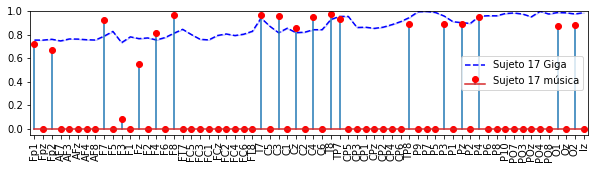

In [ ]:
import matplotlib
# Visualize the result
ydata = []
ydata_= []
for s in range(1):
  ydata.append(np.mean(corr_sub[s][:,:,0],axis=0))
  ydata_.append(np.std(corr_sub[s][:,:,0],axis=0))
xdata = list(np.arange(1,65))

# número de canales que se van a utilizar.
channels_num = np.array([ 1, 33, 34,  2,  3, 37, 36, 35,  7,  6,  5,  4, 38, 39, 40, 41, 
                42,  8,  9, 10, 11, 47, 46, 45, 44, 43, 15, 14, 13, 12, 48, 49, 
                50, 51, 52, 16, 17, 18, 19, 32, 56, 55, 54, 53, 24, 23, 22, 21,
                20, 31, 57, 58, 59, 60, 61, 25, 26, 30, 63, 62, 27, 29, 64, 28])-1

s = 0
xfit = xdata
yfit = ydata[s][channels_num]
yfit_ord=np.sort(yfit)[::-1]
ranked = np.argsort(yfit)[::-1]
dyfit= ydata_[s][channels_num]
dyfit_ord = dyfit[ranked]
plt.figure(figsize=(10,5))
# plt.plot(xdata, ydata[0], 'ob')
plt.subplot(2,1,1)
plt.plot(xfit, yfit, '--', color='b',label='Sujeto 17 Giga')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='b', alpha=0.2)
plt.xticks(xdata, list(np.asarray(ch_names)[channels_num]), rotation ='vertical')
# plt.title('Sujeto 43')

channels__ = ['Fp1','Fp2','F7','F3','Fz','F4','F8','T7','C3','Cz','C4','T8',
            'TP7','TP8','P3','Pz','P4','O1','O2']


dats = np.array([0.72147611, 0.67358504, 0.92557026, 0.079509581, 0.55403547,
       0.81773474, 0.96631226, 0.96914705, 0.95756662, 0.85985554,
       0.95384565, 0.97327096, 0.93618525, 0.8904974 , 0.89329328,
       0.88907089, 0.94880674, 0.87688139, 0.87843379])
dats_ = list()
pos = 0
for ch in list(np.asarray(ch_names)[channels_num]):
  if pos > 18:
    pos = 18
  if ch == channels__[pos]:
      dats_.append(dats[pos])
      pos+=1
  else:
    dats_.append(0)
  
# dats = np.array([946.75073119, 948.95087984, 945.5174966 , 950.33370982, 940.40114429, 943.11863916, 942.24235514, 956.67203942, 949.38717551, 938.25030785, 947.50597862, 946.88148084, 953.37328988, 951.33628406, 961.01147658, 951.01083294, 934.89407915, 950.53567643, 949.1916164 , 930.94631311, 948.36931402, 950.7060164 , 928.99097978, 951.73663095, 944.98441957, 936.29389158, 924.13434689, 963.44656799, 941.91811547, 942.54712592, 948.97504323, 952.47448322, 956.71859841, 954.95191673, 960.27293025, 945.66053384, 948.62067181, 955.00127071, 949.17531148, 949.17692249, 948.5167463 , 941.10444856, 945.16674595, 950.35734836, 947.09572041, 948.15780118, 938.70905952, 946.88039405, 944.94405047, 946.43294192, 951.92826063, 954.96610656, 949.47828055, 953.28553473, 947.34796078, 952.02263411, 948.57940557, 946.11731301, 945.59903073, 944.74222743, 952.6970298 , 956.68812992, 946.43437671, 955.12913584])/1000
# dats=np.array([918.56813889, 921.81243002, 920.67679868, 932.17841383, 912.9177689 , 910.6149075 , 902.4814676 , 909.33913147, 932.98768345, 910.3336864 , 915.37019354, 915.45159994, 897.77647811, 894.23439901, 910.44891315, 888.36939274, 887.77987415, 930.73349505, 913.15504995, 929.00170248, 930.46021441, 915.00134907, 906.55756011, 906.12274573, 916.5108063 , 912.68373559, 912.92678172, 902.20603462, 914.88489171, 899.34219131, 893.36613375, 904.33378717, 921.55157982, 927.14352279, 927.08182849, 904.69525661, 923.10445852, 911.73452637, 928.95709031, 916.95279725, 921.39442472, 928.07815284, 918.11937189, 910.27653987, 916.54105734, 898.10133602, 897.37535214, 914.97214874, 900.04799254, 902.9079574 , 900.52731156, 912.49058045, 904.19620684, 898.35027422, 906.26053556, 897.13300085, 902.07273222, 889.46557305, 921.02206707, 905.60110661, 914.80510885, 913.88653289, 907.81382144, 848.73904426])
# s = 1
# xfit = xdata
# yfit = ydata[s]
# yfit_ord=np.sort(yfit)[::-1]
# ranked = np.argsort(yfit)[::-1]
# dyfit= ydata_[s]
# dyfit_ord = dyfit[ranked]
# # plt.plot(xdata, ydata[0], 'ob')
plt.stem(xdata,dats_,markerfmt='or',label='Sujeto 17 música')
# plt.plot(xfit, dats_, '-', color='r')
# plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
#                  color='r', alpha=0.2)
# plt.xticks(xdata, ch_names_, rotation ='vertical')
plt.xlim(0.5, 64.5)
plt.ylim(-0.05, 1.0)
plt.margins(0.2)

# plt.subplot(2,1,2)
# s = 0
# xfit = xdata
# yfit = ydata[s]
# yfit_ord=np.sort(yfit)[::-1]
# ranked = np.argsort(yfit)[::-1]
# dyfit= ydata_[s]
# dyfit_ord = dyfit[ranked]
# plt.plot(xfit, yfit_ord, '-', color='b')
# plt.fill_between(xfit, yfit_ord - dyfit_ord, yfit_ord + dyfit_ord,
#                  color='b', alpha=0.2)

# s = 1
# xfit = xdata
# yfit = ydata[s]
# yfit_ord=np.sort(yfit)[::-1]
# dyfit= ydata_[s]
# dyfit_ord = dyfit[ranked]
# plt.plot(xfit, yfit_ord, '-', color='r')
# plt.fill_between(xfit, yfit_ord - dyfit_ord, yfit_ord + dyfit_ord,
#                  color='r', alpha=0.2)

# plt.xlim(0.5, 64.5)
# plt.margins(0.2)
# ch_names_2 = np.asarray(ch_names)[ranked]
# plt.xticks(xdata, ch_names_2, rotation ='vertical')
# plt.xticks(xdata, ch_names[:-3], rotation ='vertical')
plt.legend()
plt.show()
# mne.viz.plot_topomap(yfit,info,sensors=True,cmap='viridis',vmin=0,vmax=1)
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


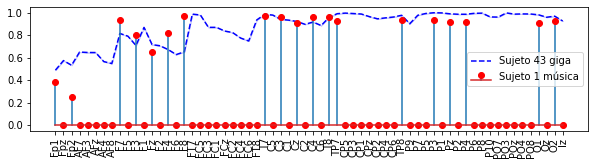

In [ ]:
import matplotlib
# Visualize the result
ydata = []
ydata_= []
for s in range(2):
  ydata.append(np.mean(corr_sub[s][:,:,0],axis=0))
  ydata_.append(np.std(corr_sub[s][:,:,0],axis=0))
xdata = list(np.arange(1,65))

s = 1
xfit = xdata
yfit = ydata[s][channels_num]
yfit_ord=np.sort(yfit)[::-1]
ranked = np.argsort(yfit)[::-1]
dyfit= ydata_[s][channels_num]
dyfit_ord = dyfit[ranked]
plt.figure(figsize=(10,5))
# plt.plot(xdata, ydata[0], 'ob')
plt.subplot(2,1,1)
plt.plot(xfit, yfit, '--', color='b',label='Sujeto 43 giga')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='b', alpha=0.2)
plt.xticks(xdata, list(np.asarray(ch_names)[channels_num]), rotation ='vertical')
# plt.title('Sujeto 17')

channels__ = ['Fp1','Fp2','F7','F3','Fz','F4','F8','T7','C3','Cz','C4','T8',
            'TP7','TP8','P3','Pz','P4','O1','O2']

dats = np.array([0.38657623, 0.24765343, 0.93282086, 0.80145659, 0.6505928 ,
       0.82253298, 0.96845703, 0.97073047, 0.96268655, 0.90562683,
       0.95826525, 0.96517053, 0.92567831, 0.933331  , 0.93641411,
       0.91849969, 0.9197987 , 0.90948508, 0.92685962])

dats_ = list()
pos = 0
for ch in list(np.asarray(ch_names)[channels_num]):
  if pos > 18:
    pos = 18
  if ch == channels__[pos]:
      dats_.append(dats[pos])
      pos+=1
  else:
    dats_.append(0)
    
# dats = np.array([946.75073119, 948.95087984, 945.5174966 , 950.33370982, 940.40114429, 943.11863916, 942.24235514, 956.67203942, 949.38717551, 938.25030785, 947.50597862, 946.88148084, 953.37328988, 951.33628406, 961.01147658, 951.01083294, 934.89407915, 950.53567643, 949.1916164 , 930.94631311, 948.36931402, 950.7060164 , 928.99097978, 951.73663095, 944.98441957, 936.29389158, 924.13434689, 963.44656799, 941.91811547, 942.54712592, 948.97504323, 952.47448322, 956.71859841, 954.95191673, 960.27293025, 945.66053384, 948.62067181, 955.00127071, 949.17531148, 949.17692249, 948.5167463 , 941.10444856, 945.16674595, 950.35734836, 947.09572041, 948.15780118, 938.70905952, 946.88039405, 944.94405047, 946.43294192, 951.92826063, 954.96610656, 949.47828055, 953.28553473, 947.34796078, 952.02263411, 948.57940557, 946.11731301, 945.59903073, 944.74222743, 952.6970298 , 956.68812992, 946.43437671, 955.12913584])/1000
# dats=np.array([918.56813889, 921.81243002, 920.67679868, 932.17841383, 912.9177689 , 910.6149075 , 902.4814676 , 909.33913147, 932.98768345, 910.3336864 , 915.37019354, 915.45159994, 897.77647811, 894.23439901, 910.44891315, 888.36939274, 887.77987415, 930.73349505, 913.15504995, 929.00170248, 930.46021441, 915.00134907, 906.55756011, 906.12274573, 916.5108063 , 912.68373559, 912.92678172, 902.20603462, 914.88489171, 899.34219131, 893.36613375, 904.33378717, 921.55157982, 927.14352279, 927.08182849, 904.69525661, 923.10445852, 911.73452637, 928.95709031, 916.95279725, 921.39442472, 928.07815284, 918.11937189, 910.27653987, 916.54105734, 898.10133602, 897.37535214, 914.97214874, 900.04799254, 902.9079574 , 900.52731156, 912.49058045, 904.19620684, 898.35027422, 906.26053556, 897.13300085, 902.07273222, 889.46557305, 921.02206707, 905.60110661, 914.80510885, 913.88653289, 907.81382144, 848.73904426])
# s = 1
# xfit = xdata
# yfit = ydata[s]
# yfit_ord=np.sort(yfit)[::-1]
# ranked = np.argsort(yfit)[::-1]
# dyfit= ydata_[s]
# dyfit_ord = dyfit[ranked]
# # plt.plot(xdata, ydata[0], 'ob')
plt.stem(xdata,dats_,markerfmt='or',label='Sujeto 1 música')

# plt.subplot(2,1,2)
# s = 0
# xfit = xdata
# yfit = ydata[s]
# yfit_ord=np.sort(yfit)[::-1]
# ranked = np.argsort(yfit)[::-1]
# dyfit= ydata_[s]
# dyfit_ord = dyfit[ranked]
# plt.plot(xfit, yfit_ord, '-', color='b')
# plt.fill_between(xfit, yfit_ord - dyfit_ord, yfit_ord + dyfit_ord,
#                  color='b', alpha=0.2)

# s = 1
# xfit = xdata
# yfit = ydata[s]
# yfit_ord=np.sort(yfit)[::-1]
# dyfit= ydata_[s]
# dyfit_ord = dyfit[ranked]
# plt.plot(xfit, yfit_ord, '-', color='r')
# plt.fill_between(xfit, yfit_ord - dyfit_ord, yfit_ord + dyfit_ord,
#                  color='r', alpha=0.2)


# plt.xlim(0.5, 64.5)
# plt.margins(0.2)
# ch_names_2 = np.asarray(ch_names)[ranked]
# plt.xticks(xdata, ch_names_2, rotation ='vertical')
# plt.xticks(xdata, ch_names[:-3], rotation ='vertical')
plt.legend()
plt.show()
# mne.viz.plot_topomap(yfit,info,sensors=True,cmap='viridis',vmin=0,vmax=1)
# plt.show()